In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
#--------------------Naive Bayes Classifier-----------------------------------

# loading data into pandas dataframe
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
test_results = pd.read_csv("gender_submission.csv")

# preprocessing

# replacing text with numeric values
train_data["Sex"] = np.where(train_data["Sex"] == "male", 0, 1)
test_data["Sex"] = np.where(test_data["Sex"] == "male", 0, 1)

train_data["Embarked"].mask(train_data["Embarked"] == "S", 0, inplace=True)
train_data["Embarked"].mask(train_data["Embarked"] == "C", 1, inplace=True) 
train_data["Embarked"].mask(train_data["Embarked"] == "Q", 2, inplace=True)

# dropping columns with mixed and less data 
train_data = train_data.drop("Cabin", axis=1)
train_data = train_data.drop("Name", axis=1)
train_data = train_data.drop("Ticket", axis=1)

# removing null rows
train_data = train_data.dropna(how='any',axis=0)  

# making age and fare into a class
train_data.loc[train_data["Age"] > 90, "Age"] = 0
train_data.loc[train_data["Age"] > 60, "Age"] = 1
train_data.loc[train_data["Age"] > 30, "Age"] = 2
train_data.loc[train_data["Age"] > 2, "Age"] = 3

train_data.loc[train_data["Fare"] > 200, "Fare"] = 0
train_data.loc[train_data["Fare"] > 100, "Fare"] = 1
train_data.loc[train_data["Fare"] > 50, "Fare"] = 2
train_data.loc[train_data["Fare"] > 2, "Fare"] = 3

print(train_data)

     PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Fare Embarked
0              1         0       3    0  3.0      1      0   3.0        0
1              2         1       1    1  2.0      1      0   2.0        1
2              3         1       3    1  3.0      0      0   3.0        0
3              4         1       1    1  2.0      1      0   2.0        0
4              5         0       3    0  2.0      0      0   3.0        0
..           ...       ...     ...  ...  ...    ...    ...   ...      ...
885          886         0       3    1  2.0      0      5   3.0        2
886          887         0       2    0  3.0      0      0   3.0        0
887          888         1       1    1  3.0      0      0   3.0        0
889          890         1       1    0  3.0      0      0   3.0        1
890          891         0       3    0  2.0      0      0   3.0        2

[712 rows x 9 columns]


In [45]:
# this function is used to group passenger id under different class 
# features
def group_into_class(df, column_name):
    grouped = df.groupby(['PassengerId', column_name])
    classified_dict = {}
    for i,j in grouped: classified_dict[i[1]] = []
    for i,j in grouped: classified_dict[i[1]].append(i[0])
    return classified_dict


In [46]:
# this function is used to calculate probabilities using bayes theorem
def get_probabilities(df, feature_name, survived, probability_survived, 
                      total_survived, total_count):
    count = 0
    probabilities = {}
    for i,j in group_into_class(df, feature_name).items():
        for k in j:
            if k in survived[1] : count = count + 1
        probabilities[i] = ((count/total_survived)*probability_survived)/(
                                                  len(j)/total_count)
        count = 0
    return probabilities

In [56]:
# this function is used to predict the output based on the probabilities 
def predict_naive_bayes(df, feature_names, probability_weights):
    new_dict = {}

    for f in feature_names:
      for i,j in group_into_class(df, f).items():
        for k in j:
          p = probability_weights[f][i]
          if k not in new_dict.keys(): new_dict[k] = 0
          new_dict[k] = new_dict[k] + p

    for i, j in new_dict.items():
      new_dict[i] = 1 if (j/len(feature_names) > 1 - j/len(feature_names)) else 0

    return new_dict

In [57]:
# this function is used to give % accuracy of the model
def calculate_accuracy(output_dict, df):
    accuracy = 0
    df_dict = {}
    for i,j in zip(df['PassengerId'].values, df['Survived'].values):
      df_dict[i] = j
    for i,j in output_dict.items():
      if output_dict[i] == df_dict[i]: accuracy = accuracy + 1
    return str((accuracy/len(output_dict.values())*100))

In [59]:
# ---------------------------Main (Naive Bayes)------------------------------
if __name__ == "__main__":

  survived = group_into_class(train_data, 'Survived')
  total_survived = len(survived[1])
  total_count = len(survived[0]) + len(survived[1])
  probability_survived = total_survived/total_count

  # using only Sex column for training 

  gender_probability_weights = get_probabilities(train_data, "Sex", survived, 
                    probability_survived, total_survived, total_count)

  prediction_on_test_data =  predict_naive_bayes(test_data, ["Sex"],
                              {"Sex": gender_probability_weights})
  
  print("Accuracy of prediction on test data - ", calculate_accuracy(
                                        prediction_on_test_data, test_results))
  
  print("\nEnd of naive bayes")
  print("-----------------------------------------------------------------")

Accuracy of prediction on test data -  100.0

End of naive bayes
-----------------------------------------------------------------


     PassengerId  Survived   Age     Fare
0              1         0  22.0   7.2500
1              2         1  38.0  71.2833
2              3         1  26.0   7.9250
3              4         1  35.0  53.1000
4              5         0  35.0   8.0500
..           ...       ...   ...      ...
885          886         0  39.0  29.1250
886          887         0  27.0  13.0000
887          888         1  19.0  30.0000
889          890         1  26.0  30.0000
890          891         0  32.0   7.7500

[711 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWar

Text(0, 0.5, 'Age')

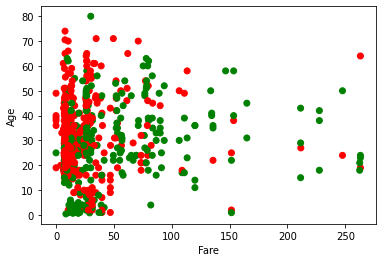

In [ ]:


train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
test_results = pd.read_csv("gender_submission.csv")

# preprocessing

# dropping columns with mixed, irrelevant and less data points
train_data = train_data.drop("Cabin", 1)
train_data = train_data.drop("Name", 1)
train_data = train_data.drop("Ticket", 1)
train_data = train_data.drop("SibSp", 1)
train_data = train_data.drop("Parch", 1)
train_data = train_data.drop("Embarked", 1)
train_data = train_data.drop("Pclass", 1)
train_data = train_data.drop("Sex", 1)

# removing null and sparse data points
train_data = train_data.dropna(how='any',axis=0) 
train_data.drop(train_data[train_data["Fare"]>300].index, inplace=True)

print(train_data)

colormap = np.array(['r', 'g'])
plt.scatter(train_data['Fare'].tolist(), train_data['Age'].tolist(), 
            c=colormap[train_data['Survived'].to_numpy()])
plt.xlabel("Fare")
plt.ylabel("Age")


In [ ]:
def euclid_dist(x1, y1, x2, y2):  
  return ((x2-x1)**2 + (y2-y1)**2)**0.5

In [ ]:
def classify_data_points(train_data):
  new_dict = {}
  for x,y,p in zip(train_data["Fare"].to_list(), train_data["Age"].to_list(), 
                   train_data["Survived"].to_list()):
    if p not in new_dict.keys(): new_dict[p] = [(x,y)]
    else : new_dict[p].append((x,y))
  return new_dict

In [ ]:
def predict_knn(data, test_data, threshold):
  prediction = {}
  dists = []
  for x,y,id in zip(test_data["Fare"].to_list(), test_data["Age"].to_list(), 
                   test_data["PassengerId"].to_list()):
    for i,j in data.items():
      for k in j:
        dist = euclid_dist(k[0], k[1], x, y)
        if dist <= threshold: dists.append(dist)
      if i == 1: survived_dists = dists
      else : not_survived_dists = dists
      dists = []
    if len(survived_dists)>len(not_survived_dists): p = 1
    else : p = 0
    prediction[id] = p
  return prediction

{892: 0, 893: 0, 894: 1, 895: 0, 896: 0, 897: 1, 898: 0, 899: 1, 900: 0, 901: 1, 902: 0, 903: 0, 904: 1, 905: 0, 906: 0, 907: 1, 908: 0, 909: 0, 910: 0, 911: 0, 912: 1, 913: 0, 914: 0, 915: 1, 916: 0, 917: 0, 918: 1, 919: 0, 920: 0, 921: 0, 922: 1, 923: 1, 924: 1, 925: 0, 926: 1, 927: 0, 928: 0, 929: 0, 930: 0, 931: 0, 932: 0, 933: 0, 934: 0, 935: 0, 936: 1, 937: 0, 938: 0, 939: 0, 940: 1, 941: 0, 942: 0, 943: 0, 944: 1, 945: 0, 946: 0, 947: 0, 948: 0, 949: 0, 950: 0, 951: 0, 952: 0, 953: 0, 954: 0, 955: 0, 956: 0, 957: 0, 958: 0, 959: 1, 960: 0, 961: 0, 962: 0, 963: 0, 964: 0, 965: 0, 966: 0, 967: 0, 968: 0, 969: 0, 970: 0, 971: 0, 972: 1, 973: 0, 974: 1, 975: 0, 976: 0, 977: 0, 978: 0, 979: 0, 980: 0, 981: 1, 982: 0, 983: 0, 984: 1, 985: 0, 986: 0, 987: 0, 988: 0, 989: 0, 990: 0, 991: 0, 992: 1, 993: 1, 994: 0, 995: 0, 996: 0, 997: 0, 998: 0, 999: 0, 1000: 0, 1001: 0, 1002: 0, 1003: 0, 1004: 1, 1005: 0, 1006: 0, 1007: 0, 1008: 0, 1009: 1, 1010: 0, 1011: 0, 1012: 0, 1013: 0, 1014: 0, 

In [ ]:
def accuracy_knn(predicted, test_results):
  results = {}
  for i,j in zip(test_results["PassengerId"], test_results["Survived"]):
    results[i] = j
  count = 0
  for i,j in predicted.items():
    if results[i] == j : count = count + 1
  
  return (count/len(predicted.items()))*100

{892: 0, 893: 0, 894: 1, 895: 0, 896: 0, 897: 1, 898: 0, 899: 1, 900: 0, 901: 1, 902: 0, 903: 0, 904: 1, 905: 0, 906: 0, 907: 1, 908: 0, 909: 0, 910: 0, 911: 0, 912: 1, 913: 0, 914: 0, 915: 1, 916: 0, 917: 0, 918: 1, 919: 0, 920: 0, 921: 0, 922: 1, 923: 1, 924: 1, 925: 0, 926: 1, 927: 0, 928: 0, 929: 0, 930: 0, 931: 0, 932: 0, 933: 0, 934: 0, 935: 0, 936: 1, 937: 0, 938: 0, 939: 0, 940: 1, 941: 0, 942: 0, 943: 0, 944: 1, 945: 0, 946: 0, 947: 0, 948: 0, 949: 0, 950: 0, 951: 0, 952: 0, 953: 0, 954: 0, 955: 0, 956: 0, 957: 0, 958: 0, 959: 1, 960: 0, 961: 0, 962: 0, 963: 0, 964: 0, 965: 0, 966: 0, 967: 0, 968: 0, 969: 0, 970: 0, 971: 0, 972: 1, 973: 0, 974: 1, 975: 0, 976: 0, 977: 0, 978: 0, 979: 0, 980: 0, 981: 1, 982: 0, 983: 0, 984: 1, 985: 0, 986: 0, 987: 0, 988: 0, 989: 0, 990: 0, 991: 0, 992: 1, 993: 1, 994: 0, 995: 0, 996: 0, 997: 0, 998: 0, 999: 0, 1000: 0, 1001: 0, 1002: 0, 1003: 0, 1004: 1, 1005: 0, 1006: 0, 1007: 0, 1008: 0, 1009: 1, 1010: 0, 1011: 0, 1012: 0, 1013: 0, 1014: 0, 

In [ ]:
#for i in range(0,35):
preds = predict_knn(classify_data_points(train_data), test_data, 30)
accuracy = accuracy_knn(preds, test_results)
print(accuracy)

65.78947368421053
